<a href="https://colab.research.google.com/github/CHBendiksby/Final_Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science for Business Applications: Final Project**
###*By Joakim and Chris*

## Things to Install

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import io
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn import tree
from sklearn.linear_model import LinearRegression
from pandas_datareader import data as pdr
import yfinance as yf
import math
import nltk
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
from nltk.stem import WordNetLemmatizer
WNlem = WordNetLemmatizer()
nltk.download('wordnet')
stop_words.update(['yes', 'i'])
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')
import itertools
from collections import Counter
from wordcloud import WordCloud 
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
!pip install -qq pyLDAvis
import pyLDAvis.gensim

##Uploading the Data

In [ ]:
#Uploading the relevant data
data_spy =pd.read_csv('https://raw.githubusercontent.com/CHBendiksby/Final_Project/main/Data_SPY_2018_2019.csv')
data_tsla =pd.read_csv('https://raw.githubusercontent.com/CHBendiksby/Final_Project/main/Data_TSLA_2018_2019.csv')
data_tweets =pd.read_csv('https://raw.githubusercontent.com/CHBendiksby/Final_Project/main/Tweets_Elon_Musk.csv')

In [ ]:
data_spy.head()

,Date,Time_Start,Time_End,Time_Zone,Close,Net_Chg,Open,High,Low,Volume
0,1/2/18,14:30:00,15:00:00,UTC,267.990,1.050,267.840,268.00,267.40,8746329
1,1/2/18,15:00:00,15:30:00,UTC,268.410,0.420,267.990,268.42,267.96,5145910
2,1/2/18,15:30:00,16:00:00,UTC,268.260,-0.150,268.410,268.45,267.96,4162492
3,1/2/18,16:00:00,16:30:00,UTC,268.155,-0.105,268.265,268.41,268.12,2718490
4,1/2/18,16:30:00,17:00:00,UTC,268.150,-0.005,268.160,268.18,267.99,2144172


In [ ]:
data_tsla.head()

,Date,Time_Start,Time_End,Time_Zone,Close,Net_Chg,Open,High,Low,Volume
0,1/2/18,14:30:00,15:00:00,UTC,63.466,1.196,62.400,63.542,62.200,3367615
1,1/2/18,15:00:00,15:30:00,UTC,63.471,0.005,63.464,63.774,63.430,2287470
2,1/2/18,15:30:00,16:00:00,UTC,63.610,0.139,63.484,63.670,63.280,1323565
3,1/2/18,16:00:00,16:30:00,UTC,64.152,0.542,63.606,64.156,63.550,2069670
4,1/2/18,16:30:00,17:00:00,UTC,64.103,-0.049,64.146,64.422,63.976,1379955


In [ ]:
data_tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.280000e+18,1.280000e+18,1.590000e+12,7/14/2020,7:28:03,UTC,44196397,elonmusk,Elon Musk,NaN,Cute,['teslarati'],[],[],222,176,7883,[],[],https://twitter.com/elonmusk/status/1282939902...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
1,1.280000e+18,1.280000e+18,1.590000e+12,7/14/2020,1:10:26,UTC,44196397,elonmusk,Elon Musk,NaN,Wow,"['davidtayar5', 'teslalisa', 'stevehamel16', '...",[],[],346,180,4241,[],[],https://twitter.com/elonmusk/status/1282844872...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
2,1.280000e+18,1.280000e+18,1.590000e+12,7/13/2020,22:34:13,UTC,44196397,elonmusk,Elon Musk,NaN,Reusability is essential. A rocket that is sin...,['katlinegrey'],[],[],102,126,1551,[],[],https://twitter.com/elonmusk/status/1282805559...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
3,1.280000e+18,1.280000e+18,1.590000e+12,7/13/2020,22:12:52,UTC,44196397,elonmusk,Elon Musk,NaN,Wild times!,['vincent13031925'],[],[],438,415,13421,[],[],https://twitter.com/elonmusk/status/1282800187...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
4,1.280000e+18,1.280000e+18,1.590000e+12,7/13/2020,22:12:26,UTC,44196397,elonmusk,Elon Musk,NaN,We’re being extra paranoid. Maximizing probabi...,['spaceflightnow'],[],[],128,155,4238,[],[],https://twitter.com/elonmusk/status/1282800078...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN


##Cleaning and Visualizing the Market Data

In [ ]:
#Adding the percentage change column for later use
data_spy['Pct_Chg_Spy']=(data_spy['Close']/data_spy['Open']-1)*100
data_tsla['Pct_Chg_Tsla']=(data_tsla['Close']/data_tsla['Open']-1)*100

In [ ]:
#Combinig date and time
data_spy['DateTime']=pd.to_datetime(data_spy['Date'].apply(str)+' '+data_spy['Time_Start'].apply(str))
data_tsla['DateTime']=pd.to_datetime(data_tsla['Date'].apply(str)+' '+data_tsla['Time_Start'].apply(str))

In [ ]:
#Dropping unesessary columns
data_spy_cleaned=data_spy.drop(columns=['Date','Time_Start','Time_End','Time_Zone','Net_Chg','Open','High','Low','Volume'])
data_tsla_cleaned=data_tsla.drop(columns=['Date','Time_Start','Time_End','Time_Zone','Net_Chg','Open','High','Low','Volume'])

In [ ]:
#Changing order of columns
data_spy_cleaned=data_spy_cleaned[['DateTime','Close','Pct_Chg_Spy']]
data_tsla_cleaned=data_tsla_cleaned[['DateTime','Close','Pct_Chg_Tsla']]

In [ ]:
#Changing column names
data_spy_cleaned.columns=['Date_Time','Close_Spy','Pct_Chg_Spy']
data_tsla_cleaned.columns=['Date_Time','Close_Tsla','Pct_Chg_Tsla']

In [ ]:
data_spy_cleaned.head()

,Date_Time,Close_Spy,Pct_Chg_Spy
0,2018-01-02 14:30:00,267.990,0.056004
1,2018-01-02 15:00:00,268.410,0.156722
2,2018-01-02 15:30:00,268.260,-0.055885
3,2018-01-02 16:00:00,268.155,-0.041004
4,2018-01-02 16:30:00,268.150,-0.003729


In [ ]:
data_tsla_cleaned.head()

,Date_Time,Close_Tsla,Pct_Chg_Tsla
0,2018-01-02 14:30:00,63.466,1.708333
1,2018-01-02 15:00:00,63.471,0.011030
2,2018-01-02 15:30:00,63.610,0.198475
3,2018-01-02 16:00:00,64.152,0.858410
4,2018-01-02 16:30:00,64.103,-0.067035


In [ ]:
#Combinig tesla and market data into one table based on date and time
data_market=pd.merge(data_spy_cleaned,data_tsla_cleaned,on=['Date_Time'],how='right')

In [ ]:
data_market.head()

,Date_Time,Close_Spy,Pct_Chg_Spy,Close_Tsla,Pct_Chg_Tsla
0,2018-01-02 14:30:00,267.990,0.056004,63.466,1.708333
1,2018-01-02 15:00:00,268.410,0.156722,63.471,0.011030
2,2018-01-02 15:30:00,268.260,-0.055885,63.610,0.198475
3,2018-01-02 16:00:00,268.155,-0.041004,64.152,0.858410
4,2018-01-02 16:30:00,268.150,-0.003729,64.103,-0.067035


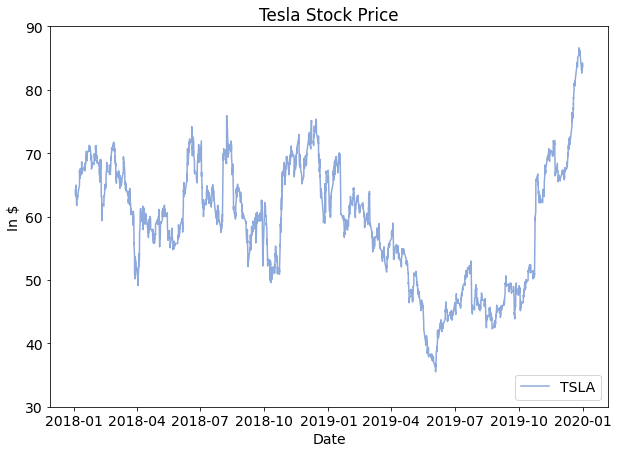

In [ ]:
#Plot of tesla stock price
plt.rcParams['figure.figsize']=(10,7)
plt.plot(data_market.Date_Time,data_market.Close_Tsla,'#8EA9DB')
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('In $')
plt.legend(['TSLA'],loc=4)
ax=plt.gca()
ax.set_ylim([30,90])
plt.rcParams.update({'font.size':14})

plt.savefig('Tsla_Price_Plot')
plt.show()

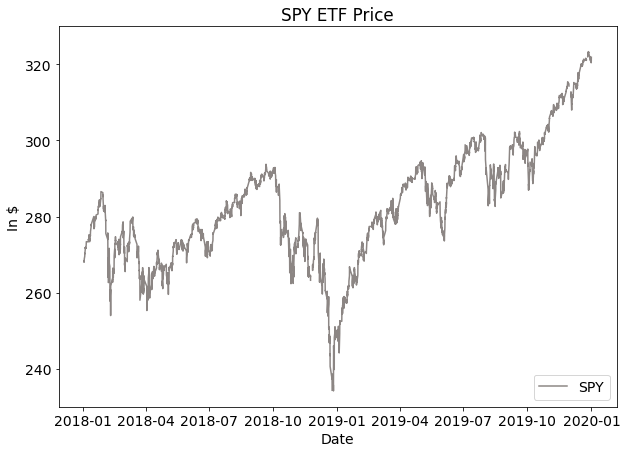

In [ ]:
#Plot of market price
plt.rcParams['figure.figsize']=(10,7)
plt.plot(data_market.Date_Time,data_market.Close_Spy,'#8C8684')
plt.title('SPY ETF Price')
plt.xlabel('Date')
plt.ylabel('In $')
plt.legend(['SPY'],loc=4)
ax=plt.gca()
ax.set_ylim([230,330])
plt.rcParams.update({'font.size':14})

plt.savefig('Spy_Price_Plot')
plt.show()

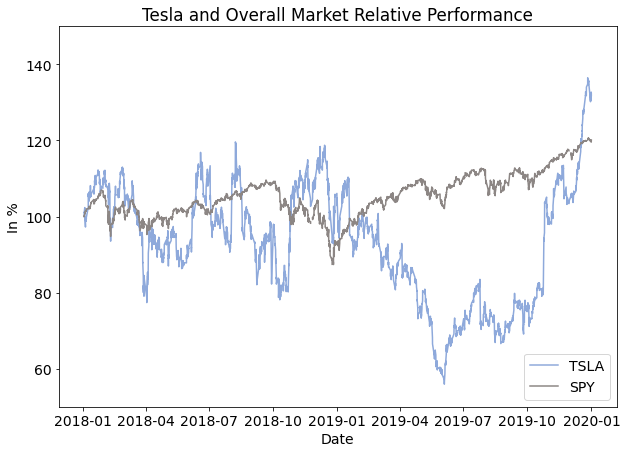

In [ ]:
#Plot comparing performance of tesla compared to overall market in time interval
plt.rcParams['figure.figsize']=(10,7)
plt.plot(data_market.Date_Time,data_market.Close_Tsla/data_market.Close_Tsla.iloc[0]*100,'#8EA9DB')
plt.plot(data_market.Date_Time,data_market.Close_Spy/data_market.Close_Spy.iloc[0]*100,'#8C8684')
plt.title('Tesla and Overall Market Relative Performance')
plt.xlabel('Date')
plt.ylabel('In %')
plt.legend(['TSLA','SPY'],loc=4)
ax=plt.gca()
ax.set_ylim([50,150])
plt.rcParams.update({'font.size':14})

plt.savefig('Comp_Plot')
plt.show()

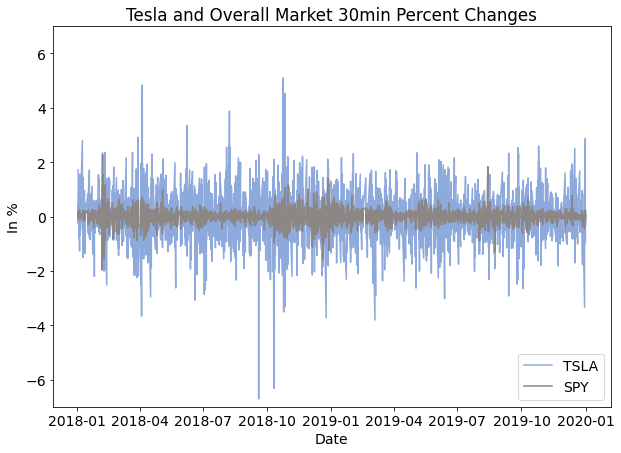

In [ ]:
#Plot of tesla stock price and market price percentage changes per 30 min interval
plt.rcParams['figure.figsize']=(10,7)
plt.plot(data_market.Date_Time,data_market.Pct_Chg_Tsla,'#8EA9DB')
plt.plot(data_market.Date_Time,data_market.Pct_Chg_Spy,'#8C8684')
plt.title('Tesla and Overall Market 30min Percent Changes')
plt.xlabel('Date')
plt.ylabel('In %')
plt.legend(['TSLA','SPY'],loc=4)
ax=plt.gca()
ax.set_ylim([-7,7])
plt.rcParams.update({'font.size':14})

plt.savefig('Pct_Chg_Plot')
plt.show()

##Cleaning the Tweets

In [ ]:
#Combining date and time into one column
data_tweets['DateTime']=pd.to_datetime(data_tweets['date'].apply(str)+' '+data_tweets['time'].apply(str))

In [ ]:
#Dropping irrelevant columns
data_tweets_cleaned=data_tweets.drop(columns=['id','conversation_id','created_at','date','time','timezone','user_id','username','name','place','mentions','urls','replies_count','retweets_count','likes_count','hashtags','cashtags','link','retweet','quote_url','video','near','geo','source','user_rt_id','user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','trans_dest','photos'])

In [ ]:
#Changing order and name
data_tweets_cleaned=data_tweets_cleaned[['DateTime','tweet']]
data_tweets_cleaned.columns=['Date_Time','Tweet']

In [ ]:
#Only using tweets in 2018 and 2019
data_tweets_cleaned=data_tweets_cleaned[~(data_tweets_cleaned['Date_Time']>'2020-01-01')]
data_tweets_cleaned=data_tweets_cleaned[~(data_tweets_cleaned['Date_Time']<='2018-01-01')]
data_tweets_cleaned=data_tweets_cleaned.reset_index()

In [ ]:
#Drop newly created column
data_tweets_cleaned=data_tweets_cleaned.drop(columns=['index'])

In [ ]:
data_tweets_cleaned

,Date_Time,Tweet
0,2019-12-31 21:37:06,It’s a bit slow
1,2019-12-31 06:59:34,It’s not ready yet
2,2019-12-31 06:57:57,Explains 🐈 🎥
3,2019-12-31 02:27:28,Thanks all Tesla club members for helping out!...
4,2019-12-30 23:27:10,Rest in peace Syd Mead. Your art will endure.
...,...,...
5213,2018-01-07 02:33:02,"Gonna put an old school drive-in, roller skate..."
5214,2018-01-05 00:30:15,pic.twitter.com/3k71xzDIP1
5215,2018-01-05 00:30:00,Falcon Heavy goes vertical pic.twitter.com/uG1...
5216,2018-01-03 08:22:31,Using a neural net to detect rain using camera...


##Analyzing the Tweets

In [ ]:
# Cleaning the tweets and getting lemmatized tokens and the same tokens as a string:

tweet_tokens = [tokenizer.tokenize(item) for item in data_tweets_cleaned['Tweet']]
tokens_cleaned = [[word.lower() for word in item if word not in stop_words and word.isalnum() and word.isalpha()] for item in tweet_tokens]
tokens_lem = [[WNlem.lemmatize(word) for word in token] for token in tokens_cleaned]
data_tweets_cleaned['lem_tokens'] = tokens_lem
data_tweets_cleaned['lem_tokens_string'] = data_tweets_cleaned['lem_tokens'].map(lambda row: " ".join(row))

print(data_tweets_cleaned['lem_tokens'][:10])
print(data_tweets_cleaned['lem_tokens_string'][:10])
# Looks good, but still some stopwords there? Adjusting in next cell:

0                                      [it, bit, slow]
1                                     [it, ready, yet]
2                                           [explains]
3    [thanks, tesla, club, member, helping, looking...
4          [rest, peace, syd, mead, your, art, endure]
5                                             [c, tbh]
6    [many, way, solve, problem, power, requirement...
7    [building, prototype, relatively, easy, volume...
8    [headed, tesla, fremont, factory, tomorrow, he...
9      [biting, i, chew, because, i, optimistic, fool]
Name: lem_tokens, dtype: object
0                                          it bit slow
1                                         it ready yet
2                                             explains
3    thanks tesla club member helping looking forwa...
4                  rest peace syd mead your art endure
5                                                c tbh
6    many way solve problem power requirement much ...
7    building prototype relativel

In [ ]:
tokens_lem = [[word for word in item if word not in stop_words] for item in tokens_lem]
data_tweets_cleaned['lem_tokens'] = tokens_lem
data_tweets_cleaned['lem_tokens_string'] = data_tweets_cleaned['lem_tokens'].map(lambda row: " ".join(row))
print(data_tweets_cleaned['lem_tokens'][:10])
print(data_tweets_cleaned['lem_tokens_string'][:10])
# This looks better! :) 

0                                          [bit, slow]
1                                         [ready, yet]
2                                           [explains]
3    [thanks, tesla, club, member, helping, looking...
4                [rest, peace, syd, mead, art, endure]
5                                             [c, tbh]
6    [many, way, solve, problem, power, requirement...
7    [building, prototype, relatively, easy, volume...
8    [headed, tesla, fremont, factory, tomorrow, he...
9                     [biting, chew, optimistic, fool]
Name: lem_tokens, dtype: object
0                                             bit slow
1                                            ready yet
2                                             explains
3    thanks tesla club member helping looking forwa...
4                       rest peace syd mead art endure
5                                                c tbh
6    many way solve problem power requirement much ...
7    building prototype relativel

In [ ]:
# Getting sentiment score: (We can do both on the tweets as they are or pre-process them first, returns similar values, unprocessed here:)
sid = SentimentIntensityAnalyzer()

# Sentiment scores on the unprocessed tweets: 
sentiment_scores = data_tweets_cleaned['Tweet'].apply(sid.polarity_scores)
data_tweets_cleaned['sentiment_score'] = sentiment_scores
data_tweets_cleaned['sentiment_score'] = data_tweets_cleaned['sentiment_score'].apply(lambda score_dict: score_dict['compound'])
print(data_tweets_cleaned['sentiment_score'].mean())


# Sentiment scores on the 
sentiment_score_processed = data_tweets_cleaned['lem_tokens_string'].apply(sid.polarity_scores)
data_tweets_cleaned['sentiment_score_processed'] = sentiment_score_processed
data_tweets_cleaned['sentiment_score_processed'] = data_tweets_cleaned['sentiment_score_processed'].apply(lambda score_dict: score_dict['compound'])
data_tweets_cleaned['sentiment_score_processed'].head()
print(data_tweets_cleaned['sentiment_score_processed'].mean())

0.17521540820237574
0.17360563434265955


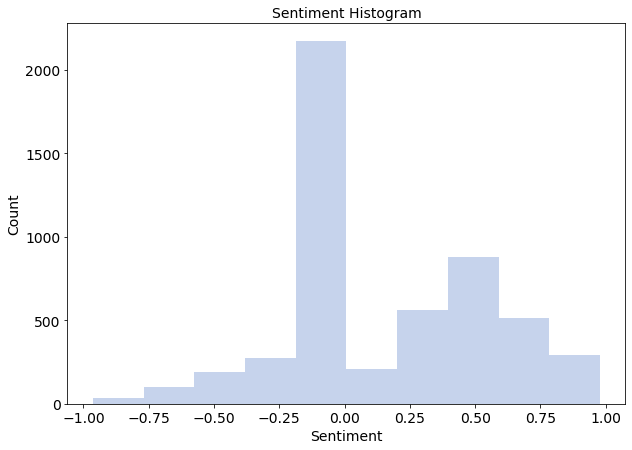

In [ ]:
#Histogram plot of sentiment scores
num_bins = 10
plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(data_tweets_cleaned.sentiment_score, num_bins, facecolor='#8EA9DB', alpha=0.5)
plt.xlabel('Sentiment',size=14)
plt.ylabel('Count',size=14)
plt.title('Sentiment Histogram',size=14)
plt.savefig('Sentiment Histogram')
plt.show();

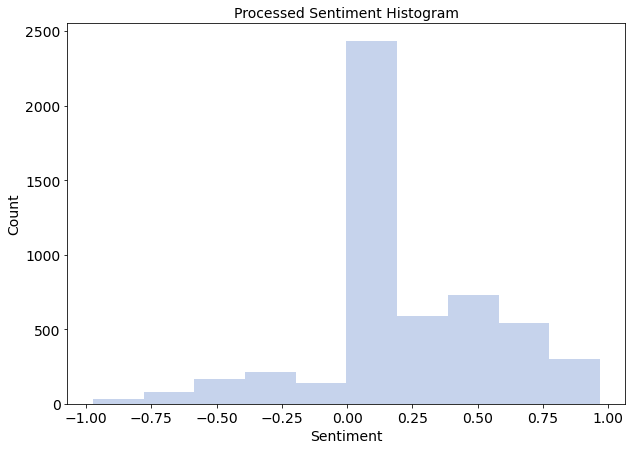

In [ ]:
#Histogram plot of processed sentiment scores
num_bins = 10
plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(data_tweets_cleaned.sentiment_score_processed, num_bins, facecolor='#8EA9DB', alpha=0.5)
plt.xlabel('Sentiment',size=14)
plt.ylabel('Count',size=14)
plt.title('Processed Sentiment Histogram',size=14)
plt.savefig('Processed Sentiment Histogram')
plt.show();

In [ ]:
# Generating rolling mean
data_tweets_cleaned['rolling_sentiment'] = data_tweets_cleaned.sentiment_score.rolling(20).mean().shift(-19)
data_tweets_cleaned['rolling_sentiment_processed'] = data_tweets_cleaned.sentiment_score_processed.rolling(20).mean().shift(-19)
print(data_tweets_cleaned['rolling_sentiment'])
print(data_tweets_cleaned['rolling_sentiment_processed'])

0       0.116975
1       0.088380
2       0.063995
3       0.078535
4       0.064685
          ...   
5213         NaN
5214         NaN
5215         NaN
5216         NaN
5217         NaN
Name: rolling_sentiment, Length: 5218, dtype: float64
0       0.124135
1       0.095540
2       0.059420
3       0.070735
4       0.071335
          ...   
5213         NaN
5214         NaN
5215         NaN
5216         NaN
5217         NaN
Name: rolling_sentiment_processed, Length: 5218, dtype: float64


In [ ]:
# Seeing who Elon mentions most:
data_tweets_cleaned['mentions'] = data_tweets_cleaned['Tweet'].map(lambda textline: [tag for tag in tokenizer.tokenize(textline) if tag.startswith('@')])

muskmentions = data_tweets_cleaned[data_tweets_cleaned['mentions'].map(len) > 0]

musk_tags = itertools.chain(*muskmentions['mentions'])

counted_tags = Counter(musk_tags)
counted_tags.most_common()[:10]

[('@SpaceX', 19),
 ('@NASA', 13),
 ('@Space_Station', 11),
 ('@lopezlinette', 7),
 ('@Hyperloop', 5),
 ('@BoringCompany', 5),
 ('@boringcompany', 4),
 ('@Reuters', 4),
 ('@businessinsider', 3),
 ('@Tesla', 3)]

<function matplotlib.pyplot.show>

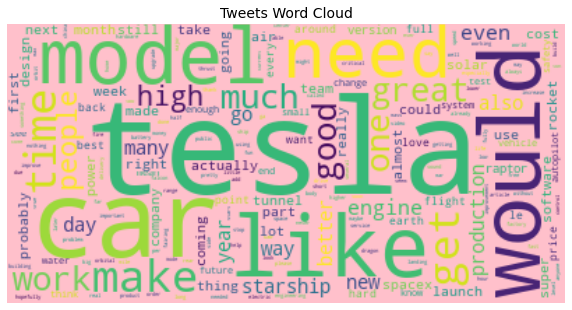

In [ ]:
# Creating a wordcloud (can also get a nicer one without too much effort I think, a real cloud would be nice): 
stop_words.update([])

conc_string = data_tweets_cleaned['lem_tokens_string'].str.cat()
# Can't be too sure:
conc_string.strip(r'[" ,.!?:;"]')

cloud_musk_tweets = WordCloud(background_color = "pink",stopwords=stop_words).generate(conc_string)
plt.figure(figsize=(10,7))
plt.imshow(cloud_musk_tweets, interpolation='bilinear')
plt.title('Tweets Word Cloud', size=14)
plt.savefig('WordCLoud')
plt.axis('off')
plt.show

In [ ]:
data_tweets_cleaned['lem_tokens'].head(50) #looks alright

0                                           [bit, slow]
1                                          [ready, yet]
2                                            [explains]
3     [thanks, tesla, club, member, helping, looking...
4                 [rest, peace, syd, mead, art, endure]
5                                              [c, tbh]
6     [many, way, solve, problem, power, requirement...
7     [building, prototype, relatively, easy, volume...
8     [headed, tesla, fremont, factory, tomorrow, he...
9                      [biting, chew, optimistic, fool]
10    [hard, believe, almost, time, retire, cargo, d...
11                                            [exactly]
12                                         [talk, call]
13             [yeah, engineering, time, spacex, tesla]
14                                       [barrel, dome]
15            [took, embarrassingly, long, time, learn]
16                                       [sound, right]
17                        [beyond, awesome, real

In [ ]:
# Find when he mentions Tesla
data_tweets_cleaned['tesla_mentioned'] = data_tweets_cleaned['lem_tokens_string'].str.contains('tesla')
data_tweets_cleaned['tesla_mentioned'].sum()

490

In [ ]:
# TF-IDF

vect = TfidfVectorizer(max_features=1000,ngram_range=(1, 2), max_df=0.5, stop_words=stop_words)

corpus = data_tweets_cleaned['lem_tokens_string']
X = vect.fit_transform(corpus)
pd.DataFrame(X.A, columns=vect.get_feature_names())

,ability,able,absolutely,access,accident,according,account,accurate,achieve,across,action,active,actual,actually,add,adding,address,advanced,affect,affordable,ago,agreed,ai,aiming,air,aircraft,allow,almost,almost done,alone,along,already,also,although,altitude,aluminum,always,amazing,america,amount,...,way,week,weekend,weight,welcome,well,whatever,wheel,white,whole,wide,wide release,win,wind,window,wing,wish,within,without,word,work,worked,working,world,worldwide,worse,worth,would,would cool,would great,wow,wrong,wrote,yeah,year,year ago,yet,yup,zero,zip
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.688214,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
# Topic modelling: 

%matplotlib inline
pyLDAvis.enable_notebook()

In [ ]:
dictionary = Dictionary(data_tweets_cleaned['lem_tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in data_tweets_cleaned['lem_tokens']]

In [ ]:
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=10, workers = 4, passes=10)


In [ ]:
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)


In [ ]:
pyLDAvis.display(lda_display)

In [ ]:
# Check out topics
lda_model.print_topics(-1)

[(0,
  '0.027*"point" + 0.023*"air" + 0.022*"yeah" + 0.018*"engine" + 0.015*"use" + 0.014*"high" + 0.014*"would" + 0.012*"good" + 0.011*"need" + 0.011*"important"'),
 (1,
  '0.031*"good" + 0.024*"tesla" + 0.023*"haha" + 0.016*"would" + 0.015*"also" + 0.012*"idea" + 0.012*"car" + 0.012*"space" + 0.011*"design" + 0.010*"get"'),
 (2,
  '0.025*"true" + 0.022*"model" + 0.020*"time" + 0.019*"tesla" + 0.017*"love" + 0.017*"production" + 0.016*"know" + 0.014*"people" + 0.012*"medium" + 0.011*"want"'),
 (3,
  '0.039*"starship" + 0.022*"cool" + 0.020*"probably" + 0.015*"sorry" + 0.013*"update" + 0.012*"year" + 0.011*"real" + 0.011*"best" + 0.010*"next" + 0.010*"take"'),
 (4,
  '0.034*"ok" + 0.025*"month" + 0.017*"week" + 0.017*"team" + 0.014*"way" + 0.012*"go" + 0.012*"around" + 0.012*"nothing" + 0.011*"tesla" + 0.011*"release"'),
 (5,
  '0.025*"great" + 0.021*"spacex" + 0.020*"sound" + 0.017*"boring" + 0.013*"company" + 0.013*"dragon" + 0.012*"people" + 0.012*"work" + 0.010*"team" + 0.010*"like

##Trading Strategy

In [ ]:
#Cleaning the data to only include what needed for the analysis
data_tweets_trading=data_tweets_cleaned.drop(columns=['Tweet','rolling_sentiment','lem_tokens','lem_tokens_string','mentions','sentiment_score','rolling_sentiment_processed'])
data_tweets_trading=data_tweets_trading[data_tweets_trading.tesla_mentioned==True]
data_tweets_trading=data_tweets_trading[data_tweets_trading.sentiment_score_processed!=0]
data_tweets_trading=data_tweets_trading.reset_index()
data_tweets_trading=data_tweets_trading.drop(columns='index')

In [ ]:
data_tweets_trading.head()

,Date_Time,sentiment_score_processed,tesla_mentioned
0,2019-12-31 02:27:28,0.6249,True
1,2019-12-30 22:41:38,0.4019,True
2,2019-12-30 09:56:51,0.2960,True
3,2019-12-30 07:57:11,0.2263,True
4,2019-12-30 07:47:20,0.6369,True


In [ ]:
#Rounding the time down to the nearest 30 min to make merging simpler
data_tweets_trading['Date_Time']=data_tweets_trading['Date_Time'].dt.floor(('30min'))

In [ ]:
data_tweets_trading.head()

,Date_Time,sentiment_score_processed,tesla_mentioned
0,2019-12-31 02:00:00,0.6249,True
1,2019-12-30 22:30:00,0.4019,True
2,2019-12-30 09:30:00,0.2960,True
3,2019-12-30 07:30:00,0.2263,True
4,2019-12-30 07:30:00,0.6369,True


In [ ]:
#Combining sentiment scores where we have mulitple data points on same date and time
data_tweets_trading=data_tweets_trading.groupby('Date_Time').agg(Average_Sentiment_Score=pd.NamedAgg(column='sentiment_score_processed',aggfunc=np.mean),)

In [ ]:
data_tweets_trading.head()

,Average_Sentiment_Score
Date_Time,
2018-02-24 03:00:00,0.42010
2018-03-22 10:00:00,0.10270
2018-04-01 22:00:00,-0.14665
2018-04-02 18:30:00,0.22630
2018-04-02 19:00:00,-0.85910


In [ ]:
#Merging the sentiment score data and the stock market data
data_tsla_trading=pd.merge(data_tsla_cleaned,data_tweets_trading,on='Date_Time')

In [ ]:
data_tsla_trading.head()

,Date_Time,Close_Tsla,Pct_Chg_Tsla,Average_Sentiment_Score
0,2018-04-02 18:30:00,50.224,-0.119322,0.2263
1,2018-04-02 19:00:00,50.386,0.446553,-0.8591
2,2018-04-04 17:00:00,55.600,1.208679,0.4404
3,2018-04-13 19:30:00,59.987,-0.538865,-0.5859
4,2018-05-11 19:30:00,60.264,0.440000,0.3182


In [ ]:
#Dropping unesessary columns
data_tsla_trading=data_tsla_trading.drop(columns=['Date_Time','Close_Tsla'])

In [ ]:
data_tsla_trading.head()

,Pct_Chg_Tsla,Average_Sentiment_Score
0,-0.119322,0.2263
1,0.446553,-0.8591
2,1.208679,0.4404
3,-0.538865,-0.5859
4,0.440000,0.3182


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


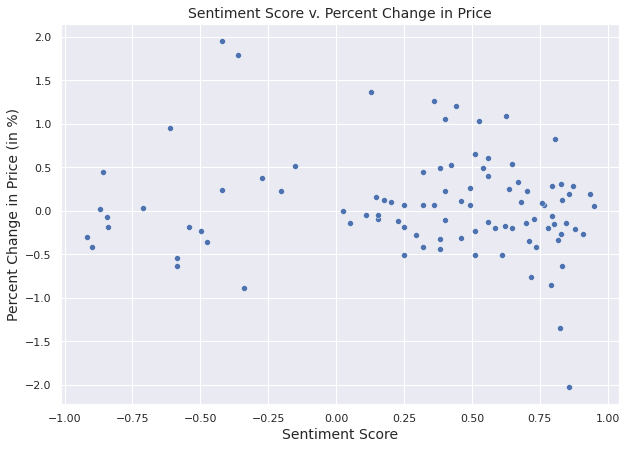

In [ ]:
#Plotting to see if we initially can see any correlation between sentiment score and percentage change in stockprice
plt.figure(figsize=(10,7))
sns.scatterplot(data_tsla_trading['Average_Sentiment_Score'],data_tsla_trading['Pct_Chg_Tsla'])
sns.set(style='darkgrid')
plt.xlabel('Sentiment Score', size=14)
plt.ylabel('Percent Change in Price (in %)', size=14)
plt.title('Sentiment Score v. Percent Change in Price', size=14)
plt.savefig('Sentiment v Price scatter')
plt.show()

In [ ]:
#Creating x and y variables for test
X=data_tsla_trading.iloc[:,1:]
y=data_tsla_trading.iloc[:,:-1]

In [ ]:
X.head()

,Average_Sentiment_Score
0,0.2263
1,-0.8591
2,0.4404
3,-0.5859
4,0.3182


In [ ]:
y.head()

,Pct_Chg_Tsla
0,-0.119322
1,0.446553
2,1.208679
3,-0.538865
4,0.440000


In [ ]:
#Scaling the data
X=StandardScaler().fit_transform(X)
y=StandardScaler().fit_transform(y)

In [ ]:
#Splitting data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25)

In [ ]:
#Fit data using XGB Regressor
trading_model_1=XGBRegressor().fit(X_train,y_train)

[22:56:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Fit data using linear regression
trading_model_2=LinearRegression().fit(X_train,y_train)

In [ ]:
#Score of using XGB
trading_model_1.score(X_test,y_test)

-0.46381729960856766

In [ ]:
#Score of using linear regression
trading_model_2.score(X_test,y_test)

-0.12894612566083619

In [ ]:

trading_model_1_pred=trading_model_1.predict(X_test)
trading_model_2_pred=trading_model_2.predict(X_test)

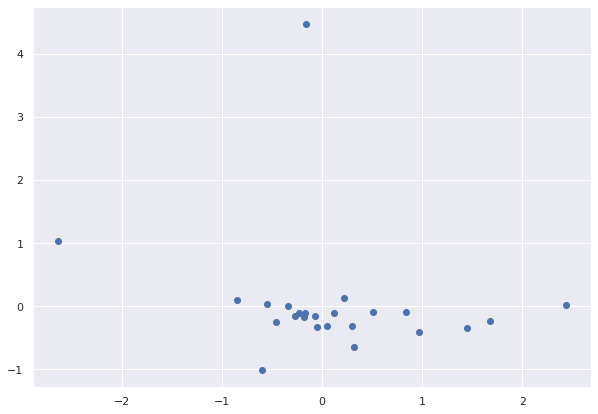

In [ ]:
plt.scatter(y_test,trading_model_1_pred)

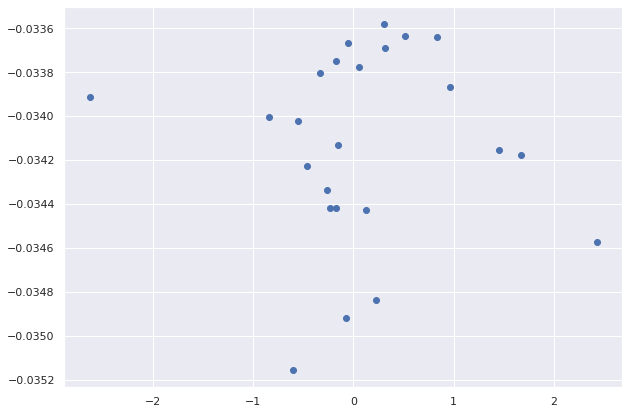

In [ ]:
plt.scatter(y_test,trading_model_2_pred)

##Investment Strategy (RNN)

In [ ]:
data_tweets_inv=data_tweets_cleaned.drop(columns=['Tweet','lem_tokens','rolling_sentiment','lem_tokens_string','mentions','sentiment_score','tesla_mentioned'])

In [ ]:
data_tweets_inv=data_tweets_inv.dropna()

In [ ]:
data_tweets_inv.columns=['Date','sentiment_score_processed','rolling_sentiment_processed']

In [ ]:
data_tweets_inv.head()

,Date,sentiment_score_processed,rolling_sentiment_processed
0,2019-12-31 21:37:06,0.0000,0.124135
1,2019-12-31 06:59:34,0.3612,0.095540
2,2019-12-31 06:57:57,0.0000,0.059420
3,2019-12-31 02:27:28,0.6249,0.070735
4,2019-12-30 23:27:10,0.5423,0.071335


In [ ]:
data_tweets_inv=data_tweets_inv.groupby([data_tweets_inv['Date'].dt.date]).agg(Average_Rolling_Sentiment_Pro=pd.NamedAgg(column='rolling_sentiment_processed',aggfunc=np.mean),)

In [ ]:
data_tweets_inv.index=pd.to_datetime(data_tweets_inv.index)

In [ ]:
data_tweets_inv.head()

,Average_Rolling_Sentiment_Pro
Date,
2018-01-28,0.342867
2018-01-29,0.277290
2018-01-30,0.206870
2018-01-31,0.171052
2018-02-01,0.116621


In [ ]:
#yahoo data
yf.pdr_override()

In [ ]:
data_tsla_inv=pdr.get_data_yahoo('tsla',start='2018-01-01',end='2019-12-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_tsla_inv.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500
2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500
2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000
2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000


In [ ]:
data_tsla_inv=data_tsla_inv.drop(columns=['Open','High','Low','Close','Volume'])

In [ ]:
data_tsla_inv.columns=['Close_Tsla']

In [ ]:
data_tsla_inv['rolling_Close_Tsla']=data_tsla_inv.Close_Tsla.rolling(20).mean()

In [ ]:
data_tsla_inv.head()

,Close_Tsla,rolling_Close_Tsla
Date,,
2018-01-02,64.106003,NaN
2018-01-03,63.450001,NaN
2018-01-04,62.924000,NaN
2018-01-05,63.316002,NaN
2018-01-08,67.281998,NaN


In [ ]:
data_tsla_inv=pd.merge(data_tsla_inv,data_tweets_inv,on='Date',how='outer')

In [ ]:
data_tsla_inv

,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro
Date,,,
2018-01-02,64.106003,NaN,NaN
2018-01-03,63.450001,NaN,NaN
2018-01-04,62.924000,NaN,NaN
2018-01-05,63.316002,NaN,NaN
2018-01-08,67.281998,NaN,NaN
...,...,...,...
2019-12-21,NaN,NaN,0.234650
2019-12-22,NaN,NaN,0.095461
2019-12-28,NaN,NaN,0.194229


In [ ]:
data_tsla_inv.Average_Rolling_Sentiment_Pro=data_tsla_inv.Average_Rolling_Sentiment_Pro.fillna(method='ffill')

In [ ]:
data_tsla_inv=data_tsla_inv.dropna()

In [ ]:
data_tsla_inv

,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro
Date,,,
2018-01-30,69.164001,67.559400,0.206870
2018-01-31,70.862000,67.897200,0.171052
2018-02-01,69.849998,68.217200,0.116621
2018-02-02,68.750000,68.508500,0.070859
2018-02-05,66.625999,68.673999,0.067578
...,...,...,...
2019-12-23,83.844002,71.384799,0.168595
2019-12-24,85.050003,72.273899,0.232209
2019-12-26,86.188004,73.294100,0.148985


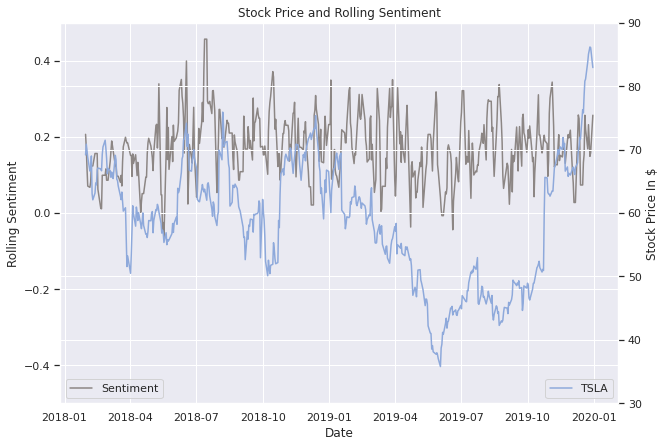

In [ ]:
plt.rcParams['figure.figsize']=(10,7)
fig,ax1=plt.subplots()


ax1.plot(data_tsla_inv.Average_Rolling_Sentiment_Pro,'#8C8684')
ax1.legend(['Sentiment'],loc=3)
ax1.set_xlabel('Date')
ax1.set_ylabel('Rolling Sentiment')
ax1.set_ylim([-0.5,0.5])

ax2=ax1.twinx()
ax2.plot(data_tsla_inv.Close_Tsla,'#8EA9DB')
ax2.legend(['TSLA'],loc=4)
ax2.set_ylabel('Stock Price In $')
ax2.set_ylim([30,90])

plt.rcParams.update({'font.size':13})
plt.title('Stock Price and Rolling Sentiment')
ax=plt.gca()

plt.savefig('Price_sentiment')
plt.show()

###Strategy 1

In [ ]:
data_tsla_inv

,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro
Date,,,
2018-01-30,69.164001,67.559400,0.206870
2018-01-31,70.862000,67.897200,0.171052
2018-02-01,69.849998,68.217200,0.116621
2018-02-02,68.750000,68.508500,0.070859
2018-02-05,66.625999,68.673999,0.067578
...,...,...,...
2019-12-23,83.844002,71.384799,0.168595
2019-12-24,85.050003,72.273899,0.232209
2019-12-26,86.188004,73.294100,0.148985


In [ ]:
data_tsla_inv_scaled=data_tsla_inv

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_tsla_inv_scaled['close_sc']=scaler.fit_transform(data_tsla_inv_scaled['Close_Tsla'].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_tsla_inv_scaled['rolling_close_sc']=scaler.fit_transform(data_tsla_inv_scaled['rolling_Close_Tsla'].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_tsla_inv_scaled['rolling_sentiment_sc']=scaler.fit_transform(data_tsla_inv_scaled['Average_Rolling_Sentiment_Pro'].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_tsla_inv_scaled=data_tsla_inv_scaled.drop(columns=['rolling_Close_Tsla','Average_Rolling_Sentiment_Pro'])

In [ ]:
data_tsla_inv_scaled['close_sc+1']=data_tsla_inv_scaled.close_sc.shift(-1,fill_value=data_tsla_inv_scaled.close_sc.iloc[-1])

In [ ]:
data_tsla_inv_scaled.head()

,Close_Tsla,close_sc,rolling_close_sc,rolling_sentiment_sc,close_sc+1
Date,,,,,
2018-01-30,69.164001,0.662182,0.784443,0.520334,0.695876
2018-01-31,70.862000,0.695876,0.794058,0.451648,0.675795
2018-02-01,69.849998,0.675795,0.803166,0.347267,0.653967
2018-02-02,68.750000,0.653967,0.811458,0.259512,0.611819
2018-02-05,66.625999,0.611819,0.816168,0.253220,0.615153


In [ ]:
data_tsla_inv_scaled_mm=data_tsla_inv_scaled.iloc[:,1:].values.astype('float32')

In [ ]:
data_tsla_inv_scaled_mm.shape

(483, 4)

In [ ]:
train_size=int(len(data_tsla_inv_scaled_mm)*.70)

In [ ]:
test_size=len(data_tsla_inv_scaled_mm)-train_size

In [ ]:
train,test=data_tsla_inv_scaled_mm[0:train_size,:],data_tsla_inv_scaled_mm[train_size:len(data_tsla_inv_scaled_mm),:]

In [ ]:
X_train_2=train[:,:-1]
y_train_2=train[:,-1]

In [ ]:
X_test_2=test[:,:-1]
y_test_2=test[:,-1]

In [ ]:
X_train_2=np.reshape(X_train_2,(X_train_2.shape[0],1,3))
X_test_2=np.reshape(X_test_2,(X_test_2.shape[0],1,3))

In [ ]:
print(X_train_2.shape,y_train_2.shape,X_test_2.shape,y_test_2.shape)

(338, 1, 3) (338,) (145, 1, 3) (145,)


In [ ]:
model_inv=Sequential()

In [ ]:
#why 50
model_inv.add(LSTM(50,input_shape=(1,3)))

In [ ]:
model_inv.add(Dense(1))

In [ ]:
model_inv.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model_inv.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10800     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#why 100 and 1
model_inv.fit(X_train_2,y_train_2, epochs=100,batch_size=1,verbose=2)

Epoch 1/100
338/338 - 2s - loss: 0.0349
Epoch 2/100
338/338 - 0s - loss: 0.0059
Epoch 3/100
338/338 - 0s - loss: 0.0039
Epoch 4/100
338/338 - 0s - loss: 0.0031
Epoch 5/100
338/338 - 0s - loss: 0.0027
Epoch 6/100
338/338 - 0s - loss: 0.0025
Epoch 7/100
338/338 - 0s - loss: 0.0024
Epoch 8/100
338/338 - 0s - loss: 0.0023
Epoch 9/100
338/338 - 0s - loss: 0.0023
Epoch 10/100
338/338 - 0s - loss: 0.0021
Epoch 11/100
338/338 - 0s - loss: 0.0022
Epoch 12/100
338/338 - 0s - loss: 0.0021
Epoch 13/100
338/338 - 0s - loss: 0.0022
Epoch 14/100
338/338 - 0s - loss: 0.0021
Epoch 15/100
338/338 - 0s - loss: 0.0021
Epoch 16/100
338/338 - 0s - loss: 0.0020
Epoch 17/100
338/338 - 0s - loss: 0.0021
Epoch 18/100
338/338 - 0s - loss: 0.0021
Epoch 19/100
338/338 - 0s - loss: 0.0022
Epoch 20/100
338/338 - 0s - loss: 0.0021
Epoch 21/100
338/338 - 0s - loss: 0.0021
Epoch 22/100
338/338 - 0s - loss: 0.0022
Epoch 23/100
338/338 - 0s - loss: 0.0021
Epoch 24/100
338/338 - 0s - loss: 0.0021
Epoch 25/100
338/338 - 0s

In [ ]:
train_predict=model_inv.predict(X_train_2)
test_predict=model_inv.predict(X_test_2)

NameError: ignored

In [ ]:
train_pred.shape

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
y_train_2=scaler.inverse_transform([y_train_2])

In [ ]:
test_predict=scaler.inverse_transform(test_predict)
y_test_2=scaler.inverse_transform([y_test_2])

In [ ]:
train_score=math.sqrt(mean_squared_error(y_train_2[0],train_predict[:,0]))
print(train_score)

0.02207761034818978


In [ ]:
test_predict.shape

(145, 1)

##### Roman's example applied to our data: 

In [ ]:
# We have 4355 samples, how many time steps do we observe / how many windows? = 1 here, and we only have one feature - we want two features later, very doable
# We can also include SPY as another feature - does this make the model better? 
# This becomes our samples, time steps and features below: 

# reshape input to be [samples, time steps, features]
import numpy
X_train = numpy.reshape(X_train, (X_train.shape[0], 1, 1))
X_test = numpy.reshape(X_test, (X_test.shape[0], 1, 1))



In [ ]:
# build the network
# We are considering 1 time step, and 1 feature - hence input shape = 1,1


model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#reg problem so mse makes sense as loss function

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
4355/4355 - 6s - loss: 0.0092
Epoch 2/100
4355/4355 - 4s - loss: 1.3396e-04
Epoch 3/100
4355/4355 - 5s - loss: 1.3603e-04
Epoch 4/100
4355/4355 - 4s - loss: 1.3371e-04
Epoch 5/100
4355/4355 - 4s - loss: 1.3606e-04
Epoch 6/100
4355/4355 - 4s - loss: 1.3588e-04
Epoch 7/100
4355/4355 - 4s - loss: 1.3546e-04
Epoch 8/100
4355/4355 - 4s - loss: 1.3655e-04
Epoch 9/100
4355/4355 - 4s - loss: 1.3699e-04
Epoch 10/100
4355/4355 - 4s - loss: 1.3692e-04
Epoch 11/100
4355/4355 - 4s - loss: 1.3513e-04
Epoch 12/100
4355/4355 - 4s - loss: 1.3300e-04
Epoch 13/100
4355/4355 - 4s - loss: 1.3571e-04
Epoch 14/100
4355/4355 - 4s - loss: 1.3367e-04
Epoch 15/100
4355/4355 - 4s - loss: 1.3494e-04
Epoch 16/100
4355/4355 - 4s - loss: 1.3417e-04
Epoch 17/100
4355/4355 - 4s - loss: 1.3272e-04
Epoch 18/100
4355/4355 - 4s - loss: 1.3616e-04
Epoch 19/100
4355/4355 - 4s - loss: 1.3474e-04
Epoch 20/100
4355/4355 - 4s - loss: 1.3628e-04
Epoch 21/100
4355/4355 - 4s - loss: 1.3513e-04
Epoch 22/100
4355/4355 - 4

In [ ]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])

testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

In [ ]:
# calculate root mean squared error
import math

trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.59 RMSE
Test Score: 0.82 RMSE


In [ ]:
data_market['tesla_pred'] = data_market['Close_Tsla']

In [ ]:
testPredict.shape

(2145, 1)

In [ ]:
data_market['tesla_pred'].iloc[-2145:] = testPredict.flatten()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


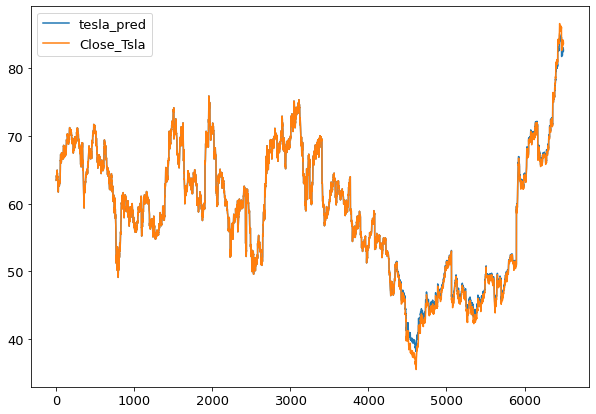

In [ ]:
data_market.loc[:,['tesla_pred','Close_Tsla']].plot()

In [ ]:
# How to do with multiple features and time steps? 





##Export

In [126]:
#file-> download ipynb ->upload file ->chnage name->
!jupyter nbconvert ==to html "/content/Final_Project.ipynb"

[NbConvertApp] WARNING | pattern u'==to' matched no files
[NbConvertApp] WARNING | pattern u'html' matched no files
[NbConvertApp] Converting notebook /content/Final_Project.ipynb to html
[NbConvertApp] Writing 1302115 bytes to /content/Final_Project.html
